<a href="https://www.kaggle.com/code/daanishhindustani/tb-squeezenet-resnet?scriptVersionId=158864850" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
import pathlib
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.layers import Input, Conv2D, ReLU, concatenate, Dropout,AvgPool2D,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import Accuracy, Precision, Recall, F1Score, FBetaScore
import os
import shutil
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

# **Retrieving Data**

## *Main Dir Url*

In [2]:
url = "/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database"

In [3]:
data_dir = pathlib.Path(url)

## *NUMBER of imgs*

In [4]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

4200


## *Elements in the dir*

In [5]:
elements = os.listdir(url)
print(elements)

['Normal.metadata.xlsx', 'Tuberculosis', 'README.md.txt', 'Tuberculosis.metadata.xlsx', 'Normal']


# Classes

In [6]:
img_type= {
    'Normal' : list(data_dir.glob('Normal/*.png')),
    'Tuberculosis' : list(data_dir.glob('Tuberculosis/*.png'))
}

## *Img samples*

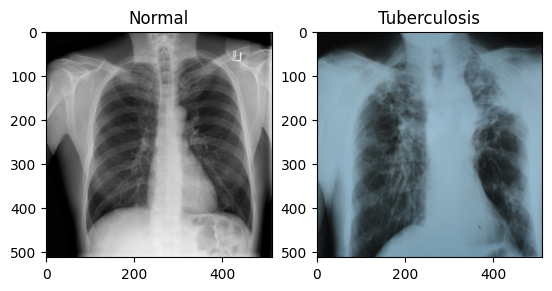

In [7]:
def img_plot_original():
    fig, axs = plt.subplots(1,2)
    i = 0
    for key, value in img_type.items():
        img = mpimg.imread(str(img_type[key][3]))
        axs[i].imshow(img)
        axs[i].set_title(key)
        i+=1
img_plot_original()  
    

## *Original dataset split*

([<matplotlib.patches.Wedge at 0x7c0bd7a6ba60>,
 [Text(-0.9526279098330698, 0.5500000594609756, 'Normal'),
  Text(0.9526278840857079, -0.5500001040567061, 'Tuberculosis')],
 [Text(-0.5196152235453108, 0.3000000324332594, '83.3%'),
  Text(0.5196152095012951, -0.30000005675820324, '16.7%')])

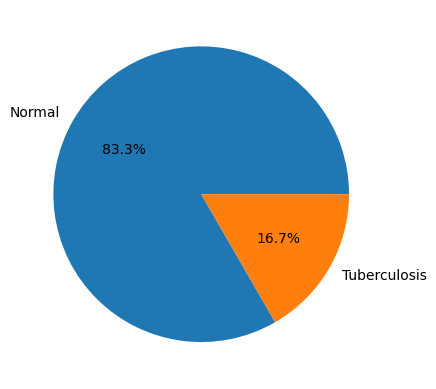

In [8]:
labels = 'Normal', 'Tuberculosis'
sizes = [len(img_type['Normal']), len(img_type['Tuberculosis'])]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

In [9]:
len(img_type['Normal'])

3500

In [10]:
len(img_type['Tuberculosis'])

700

# Reducing Data 

## *Making TESTING DIR*

In [11]:
os.mkdir('Xray-Test-Data')

In [12]:
xrayTestUrl = '/kaggle/working/Xray-Test-Data'

In [13]:
data_dir_test = pathlib.Path(xrayTestUrl)

## *TB TESTING DIR*

In [14]:
directoryTestTb = "Test-TB-Xray" 
parent_dir = xrayTestUrl
pathTestTB = os.path.join(parent_dir, directoryTestTb) 
os.mkdir(pathTestTB)

## *Making NORMAL TESTING DIR*

In [15]:
directoryTestNM = "Test-NM-Xray"
  
parent_dir = xrayTestUrl

pathTestNM = os.path.join(parent_dir, directoryTestNM) 
os.mkdir(pathTestNM) 

## *NUMBER OF NM TESTING SAMPLES*

In [16]:
normalTestImg = img_type['Normal'][1000:1101]

## *NUMBER OF TB TESTING SAMPLES*

In [17]:
tbTestImg = img_type['Tuberculosis'][600:]

## *COPYING SAMPLES INTO TESTING TB AND NM DIR*

In [18]:
destination_directory_tb = '/kaggle/working/Xray-Test-Data/Test-TB-Xray'
for img in tbTestImg:
    shutil.copy(img, destination_directory_tb)

In [19]:
destination_directory_NM = '/kaggle/working/Xray-Test-Data/Test-NM-Xray'
for img in normalTestImg:
    shutil.copy(img, destination_directory_NM)

# ----Making Training/VAL DIR 

## *TRAINING DIR*

In [20]:
os.mkdir('Xray-Data')

In [21]:
xrayUrl = '/kaggle/working/Xray-Data'

## *NM/TB TRAINING DIR*

In [22]:

directoryTB = "TB-Xray"
directoryNM = 'NM-Xray'
  
parent_dir = "/kaggle/working/Xray-Data"

pathTB = os.path.join(parent_dir, directoryTB) 
os.mkdir(pathTB) 
pathNM = os.path.join(parent_dir, directoryNM) 
os.mkdir(pathNM) 

In [23]:
#shutil.rmtree('')

## *TB/NM TRAINING SAMPLES*

In [24]:
normal_imgs = img_type['Normal'][:600]

made 900 NM to imporve percison, model generlized to false values
mode 650

In [25]:
len(normal_imgs)

600

In [26]:
tb_imgs = img_type['Tuberculosis'][:600]

In [27]:
len(tb_imgs)

600

In [28]:
img_type= {
    'Normal' : list(data_dir.glob('Normal/*.png')),
    'Tuberculosis' : list(data_dir.glob('Tuberculosis/*.png'))
}

## *COPYING TRAINING SAMPLES INTO CORROSPONDING TRAING DIR*

In [29]:
destination_directory_tb = '/kaggle/working/Xray-Data/TB-Xray'
for img in tb_imgs:
    shutil.copy(img, destination_directory_tb)
    

In [30]:
destination_directory_nm = '/kaggle/working/Xray-Data/NM-Xray'
for img in normal_imgs:
    shutil.copy(img, destination_directory_nm)

# ----Visualizing New Data

In [31]:
data_dir = pathlib.Path("/kaggle/working/Xray-Data")

In [32]:
img_type= {
    'Normal' : list(data_dir.glob('NM-Xray/*.png')),
    'Tuberculosis' : list(data_dir.glob('TB-Xray/*.png'))
}

In [33]:
len(img_type['Tuberculosis'])

600

In [34]:
len(img_type['Normal'])

600

([<matplotlib.patches.Wedge at 0x7c0bd78492a0>,
 [Text(6.735557395310444e-17, 1.1, 'Normal'),
  Text(-2.0206672185931328e-16, -1.1, 'Tuberculosis')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

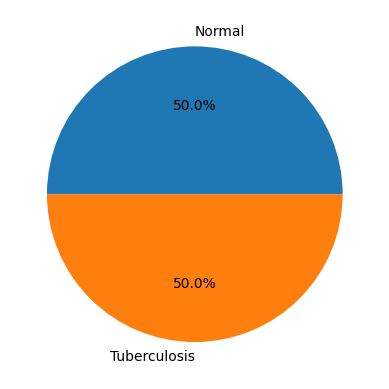

In [35]:
labels = 'Normal', 'Tuberculosis'
sizes = [len(img_type['Normal']), len(img_type['Tuberculosis'])]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')


# Augmenting Data

In [36]:
img_height = 64
img_width = 64
batch_size = 16

## *TRAINING*

In [37]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split = 0.2
)

In [38]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'binary',
    subset='training',
    seed=123
    )

Found 960 images belonging to 2 classes.


In [39]:
traing_set_len = len(train_generator)
print(traing_set_len)

60


## *VALIDATION*

In [40]:
val_datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.2)

In [41]:
val_generator = val_datagen.flow_from_directory(
    data_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'binary',
    subset='validation',
    seed=123
    )

Found 240 images belonging to 2 classes.


In [42]:
val_set_len = len(val_generator)
print(val_set_len)

15


## *TESTING*

In [43]:
test_generator = val_datagen.flow_from_directory(
    data_dir_test,
    target_size = (img_height, img_width),
    class_mode = 'binary',
    )

Found 201 images belonging to 2 classes.


In [44]:
test_set_len = len(test_generator)
print(test_set_len)


7


## *AUGMENTED TRAINING SAMPLE*

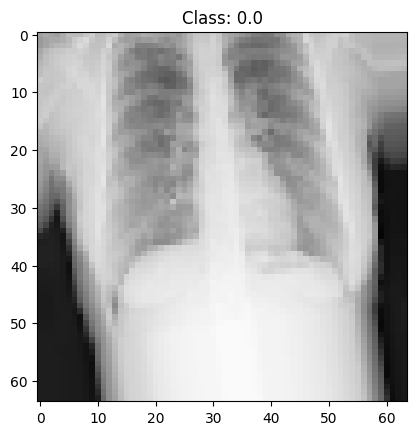

In [45]:
images, labels = next(train_generator)
# Plot one image from the batch
plt.imshow(images[0])
plt.title(f"Class: {labels[0]}")
plt.show()

## *TRAING/VALIDATION/TESTING*

([<matplotlib.patches.Wedge at 0x7c0bd7425fc0>,
 [Text(0.923301960552699, 0.5979243176519436, 'Validation'),
  Text(-1.048736003975903, -0.3318927446701039, 'Training'),
  Text(1.0606788854346743, -0.29147950527105265, 'Testing')],
 [Text(0.5036192512105631, 0.3261405369010601, '18.3%'),
  Text(-0.5720378203504926, -0.181032406183693, '73.2%'),
  Text(0.578552119328004, -0.1589888210569378, '8.5%')])

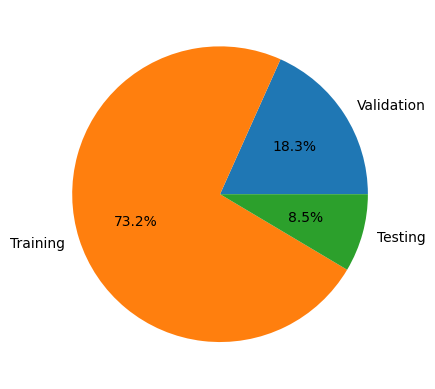

In [46]:
labels = 'Validation', 'Training', 'Testing'
sizes = [val_set_len, traing_set_len, test_set_len]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

# SQUEEZNET ARCITECTURE

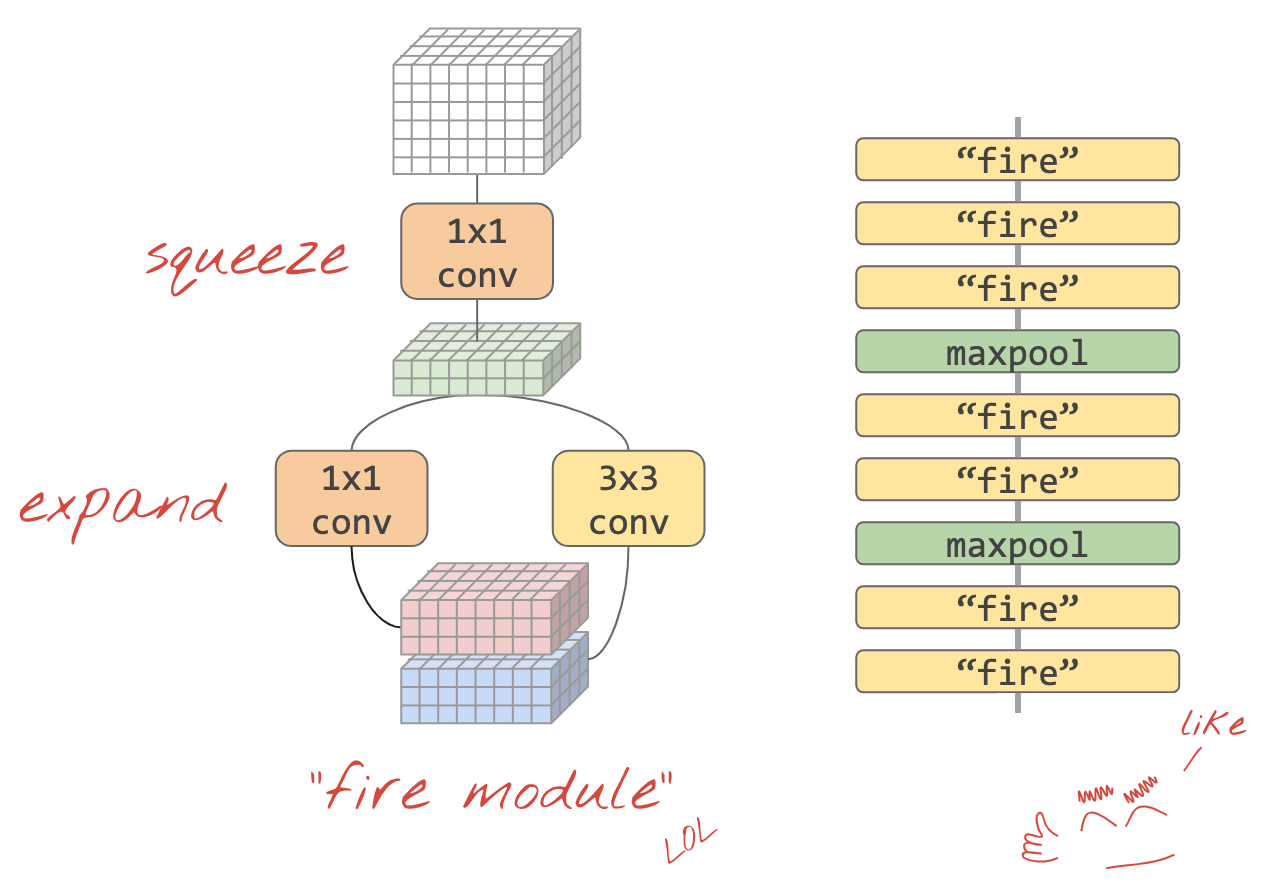

## *FIREMODE*

In [47]:
def fireMode(x, s1, e1, e3):
    sx1 = Conv2D(filters=s1, kernel_size=1, activation='relu', padding='same')(x)
    sx1 = BatchNormalization()(sx1)
    ex1 = Conv2D(filters=e1, kernel_size=1, activation='relu', padding='same')(sx1)
    ex1 = BatchNormalization()(ex1)
    ex3 = Conv2D(filters=e3, kernel_size=3, activation='relu', padding='same')(sx1)
    ex3 = BatchNormalization()(ex3)
    return concatenate([ex1, ex3])

## *MAIN NETWORK*

In [48]:
def squeezNet(input_size, classes):
    
    x = Input(shape=input_size)
    
    # Entry block
    y = Conv2D(32, kernel_size=3, activation='relu', padding='same')(x)
    y = BatchNormalization()(y)

    # Fire modules
    y = fireMode(y, 12, 24, 24)
    y = BatchNormalization()(y)
    y = GlobalAveragePooling2D()(y)
    y = BatchNormalization()(y)
    # Dense layers
    y = layers.Dense(128, activation='relu')(y)
    y = BatchNormalization()(y)
    y = Dropout(0.5)(y)
    y = BatchNormalization()(y)
    # Output layer 
    y = layers.Dense(1, activation='sigmoid')(y)

    model = Model(inputs=x, outputs=y)
    return model      

In [49]:
model = squeezNet((64,64,3), 1)

In [50]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 64, 64, 32)           896       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 64, 64, 32)           128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 conv2d_1 (Conv2D)           (None, 64, 64, 12)           396       ['batch_normalization[0][0

## *F1 SCORE*

In [51]:
def f1_score(y_true, y_pred):
    # Calculate true positives, false positives, and false negatives
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    actual_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))

    # Calculate precision and recall
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (actual_positives + tf.keras.backend.epsilon())

    # Calculate F1 score
    f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    return f1


## *TRAINING*

In [52]:
opt = Adam(learning_rate=0.001)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=['accuracy',Precision(), Recall(),f1_score])


In [53]:
history = model.fit(train_generator, steps_per_epoch=traing_set_len, epochs=10, validation_data=val_generator, validation_steps=test_set_len)

Epoch 1/10
60/60 [==============================] - ETA: 0s - batch: 29.5000 - size: 16.0000 - loss: 0.5297 - accuracy: 0.7448 - precision: 0.7930 - recall: 0.6625 - f1_score: 0.7211

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


60/60 [==============================] - 15s 208ms/step - batch: 29.5000 - size: 16.0000 - loss: 0.5297 - accuracy: 0.7448 - precision: 0.7930 - recall: 0.6625 - f1_score: 0.7211 - val_loss: 0.6814 - val_accuracy: 0.5625 - val_precision: 0.5625 - val_recall: 1.0000 - val_f1_score: 0.7111
Epoch 2/10
60/60 [==============================] - 13s 221ms/step - batch: 29.5000 - size: 16.0000 - loss: 0.4161 - accuracy: 0.8115 - precision: 0.8300 - recall: 0.7833 - f1_score: 0.7973 - val_loss: 0.7084 - val_accuracy: 0.5625 - val_precision: 0.5625 - val_recall: 1.0000 - val_f1_score: 0.7111
Epoch 3/10
60/60 [==============================] - 13s 219ms/step - batch: 29.5000 - size: 16.0000 - loss: 0.3824 - accuracy: 0.8260 - precision: 0.8366 - recall: 0.8104 - f1_score: 0.8182 - val_loss: 0.7807 - val_accuracy: 0.5625 - val_precision: 0.5625 - val_recall: 1.0000 - val_f1_score: 0.7111
Epoch 4/10
60/60 [==============================] - 13s 222ms/step - batch: 29.5000 - size: 16.0000 - loss: 0.3

## *RESULTS*

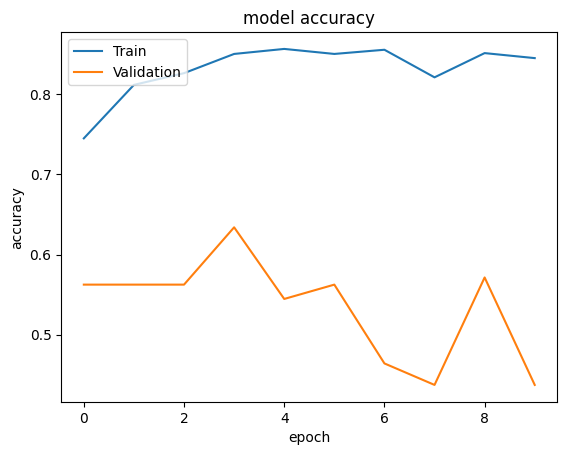

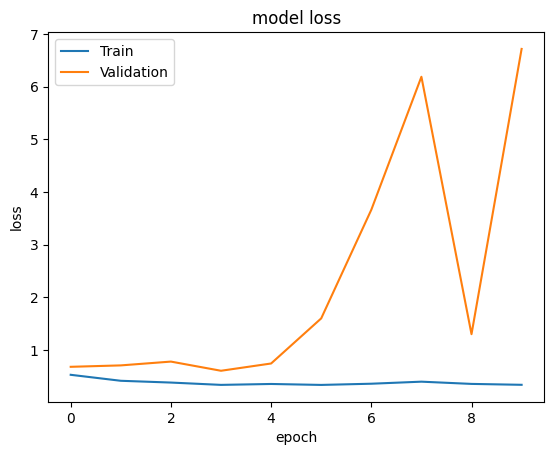

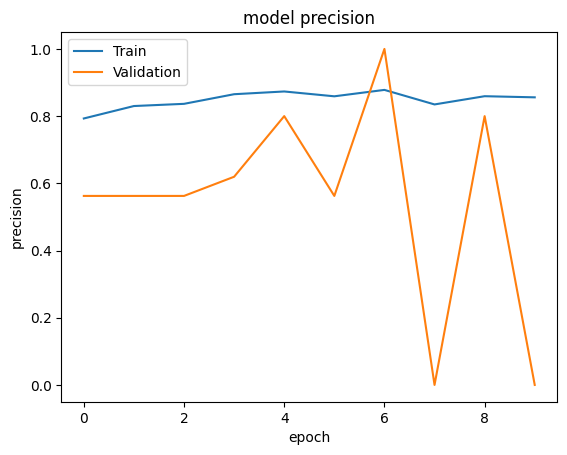

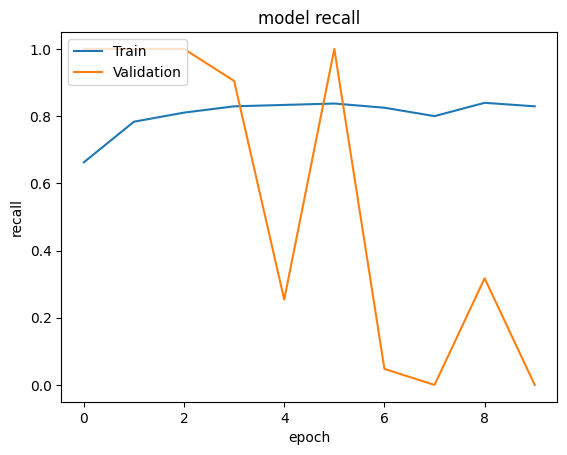

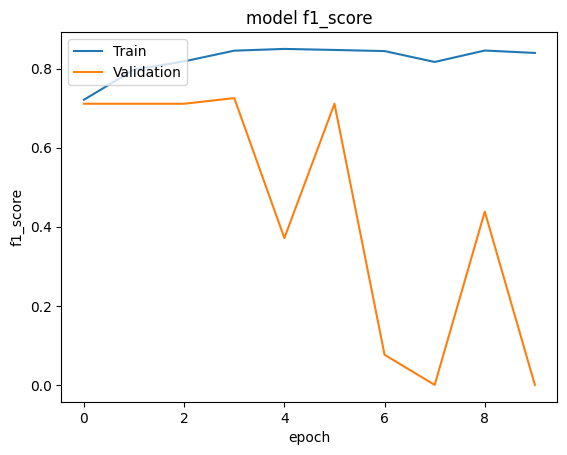

In [54]:
# summarize accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize percison
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize recall
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize recall
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# TESTING USAGE 

In [55]:
results = model.evaluate(test_generator)

In [56]:
def results_test_data(results):
    print(f"Loss: {results[0]}")
    print(f"Accuracy: {results[1]}")
    print(f"Percision: {results[2]}")
    print(f"Recall: {results[3]}")
    print(f"F1_Score: {results[4]}")

In [57]:
results_test_data(results)

Loss: 4.272299936839512
Accuracy: 0.5273631811141968
Percision: 1.0
Recall: 0.05000000074505806
F1_Score: 0.07852965593338013


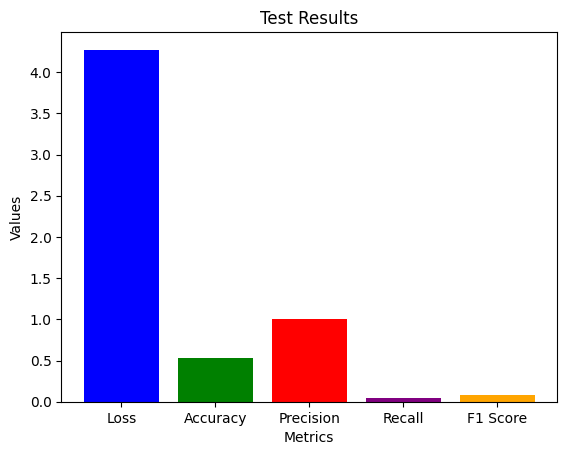

In [58]:
def results_test_data_graph(results):
    labels = ['Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
    values = results[:5]  # Assuming results is a list with at least 5 elements

    # Bar graph
    plt.bar(labels, values, color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.title('Test Results')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.show()

# Example usage
results = [results[0], results[1], results[2], results[3], results[4]]
results_test_data_graph(results)

In [59]:
predicted_values = model.predict(test_generator)

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [60]:
acutal_test_values = []
for i in range(7):
    lst = test_generator[i][1]
    for num in lst:
        acutal_test_values.append(num)
        

In [61]:
predicted_values = (predicted_values >= 0.5).astype(int)
conf_matrix = confusion_matrix(acutal_test_values, predicted_values)

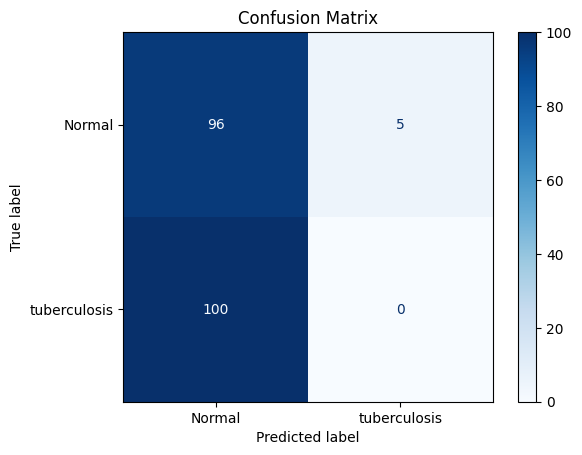

In [62]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', "tuberculosis"])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [63]:
sum = 0
for i in range(2):
    for j in range(2):
        sum += conf_matrix[i][j]

In [64]:
truth = conf_matrix[0][0] + conf_matrix[1,1]

In [65]:
false = conf_matrix[0,1] + conf_matrix[1,0]

# Resnet

### Model

In [66]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,

                   input_shape=(img_height,img_width,3),

                   pooling='avg',classes=1,

                   weights='imagenet')

for each_layer in pretrained_model.layers:

        each_layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(layers.Flatten())
resnet_model.add(BatchNormalization())
resnet_model.add(layers.Dense(128, activation='relu'))
resnet_model.add(BatchNormalization())
resnet_model.add(Dropout(0.5))
resnet_model.add(layers.Dense(64, activation='relu'))
resnet_model.add(BatchNormalization())
resnet_model.add(Dropout(0.5))
resnet_model.add(BatchNormalization())
resnet_model.add(layers.Dense(1, activation='sigmoid'))

94765736/94765736 [==============================] - 3s 0us/step


In [67]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization_8 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 batch_normalization_9 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

### Training

In [68]:
resnet_model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=['accuracy',Precision(), Recall(),f1_score])

In [69]:
history = resnet_model.fit(train_generator, steps_per_epoch=traing_set_len, epochs=10, validation_data=val_generator)

Epoch 1/10
60/60 [==============================] - ETA: 0s - batch: 29.5000 - size: 16.0000 - loss: 0.8902 - accuracy: 0.4938 - precision_1: 0.4939 - recall_1: 0.5021 - f1_score: 0.4903

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


60/60 [==============================] - 19s 267ms/step - batch: 29.5000 - size: 16.0000 - loss: 0.8902 - accuracy: 0.4938 - precision_1: 0.4939 - recall_1: 0.5021 - f1_score: 0.4903 - val_loss: 0.7142 - val_accuracy: 0.5000 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 2/10
60/60 [==============================] - 15s 256ms/step - batch: 29.5000 - size: 16.0000 - loss: 0.8695 - accuracy: 0.5031 - precision_1: 0.5032 - recall_1: 0.4979 - f1_score: 0.4840 - val_loss: 0.7032 - val_accuracy: 0.5000 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 3/10
60/60 [==============================] - 16s 261ms/step - batch: 29.5000 - size: 16.0000 - loss: 0.8292 - accuracy: 0.5323 - precision_1: 0.5322 - recall_1: 0.5333 - f1_score: 0.5248 - val_loss: 0.7064 - val_accuracy: 0.3958 - val_precision_1: 0.3188 - val_recall_1: 0.1833 - val_f1_score: 0.2184
Epoch 4/10
60/60 [==============================] - 15s 258ms/s

### Results

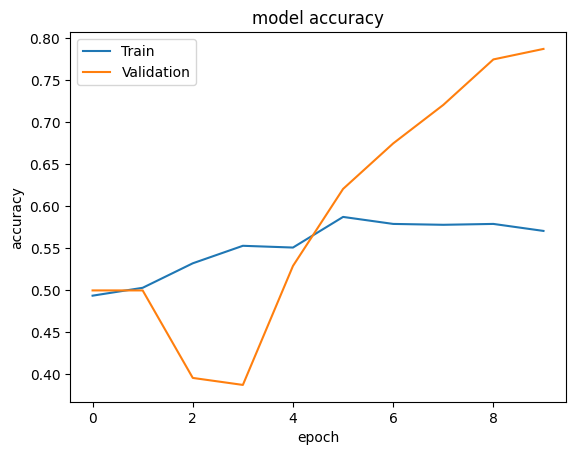

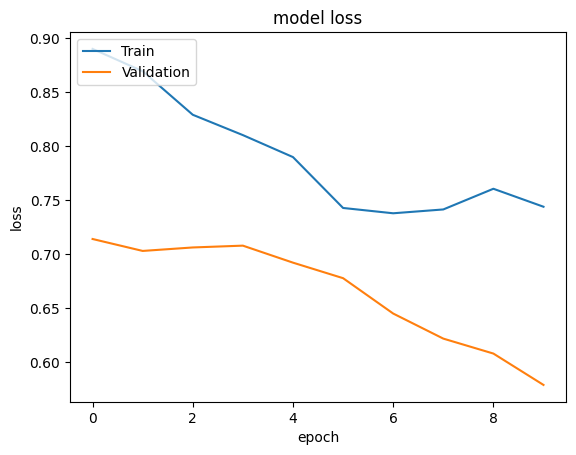

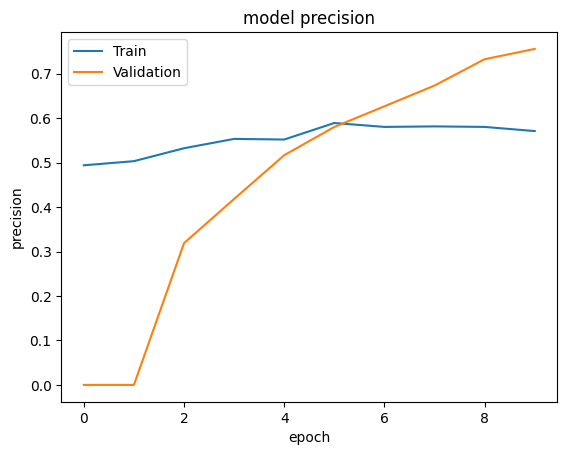

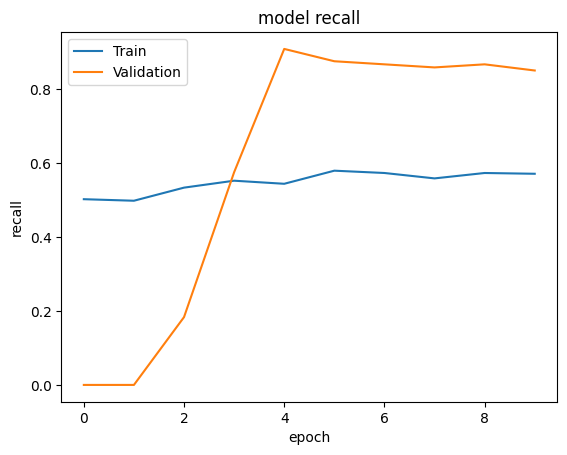

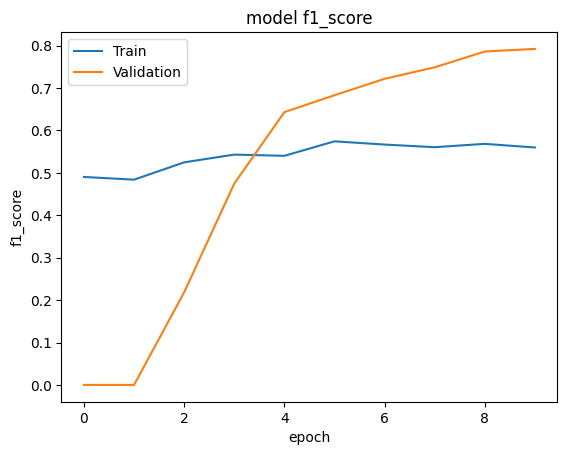

In [70]:
# summarize accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize percison
plt.plot(history.history['precision_1'])
plt.plot(history.history['val_precision_1'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize recall
plt.plot(history.history['recall_1'])
plt.plot(history.history['val_recall_1'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize recall
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [71]:
resnet_results = resnet_model.evaluate(test_generator)
#changed from model.evaluate to resnet_model.evaulate, make sure to use your models name 

In [72]:
results_test_data(resnet_results)

Loss: 0.5447220589433398
Accuracy: 0.7810945510864258
Percision: 0.7641509175300598
Recall: 0.8100000023841858
F1_Score: 0.7868618369102478


In [73]:
resnet_predicted_values = resnet_model.predict(test_generator)

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


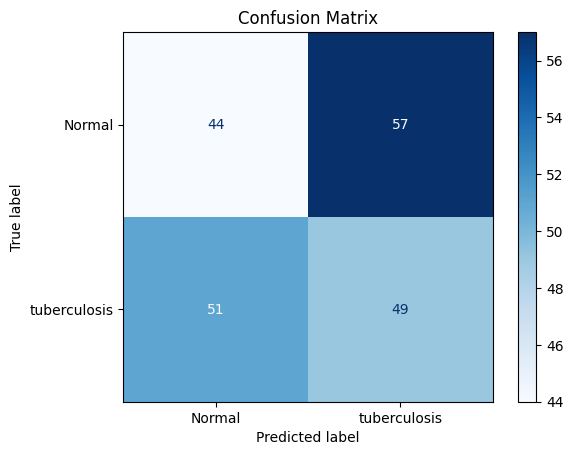

In [74]:
resnet_predicted_values = (resnet_predicted_values >= 0.5).astype(int)
conf_matrix = confusion_matrix(acutal_test_values, resnet_predicted_values)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', "tuberculosis"])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [75]:
sum = 0
for i in range(2):
    for j in range(2):
        sum += conf_matrix[i][j]
truth = conf_matrix[0][0] + conf_matrix[1,1]
false = conf_matrix[0,1] + conf_matrix[1,0]

print("Accurate predictions: " + str(truth))
print("Inaccurate predictions: " + str(false))

Accurate predictions: 93
Inaccurate predictions: 108
